**Brian Blaylock**  
*April 28, 2021*

# ☔ Precipitation Variables
Why is accumulated precipitation always zero for the model analysis? [Check out this discussion](https://github.com/blaylockbk/HRRR_archive_download/discussions/10).


## Accumulated Precipitation

> NOTE: When cfgrib reads a grib file with more than one accumulated precipitation field, it will not read all the fields. I think this is an issue with cfgrib ([see issue here](https://github.com/ecmwf/cfgrib/issues/187)). The way around this is to key in on a single APCP field, or to specify the `stepRange` in the backend kwargs. In Herbie, you can set the searchString to be more specific regarding the ACPC line to aquire.

In [1]:
from herbie.archive import Herbie
from toolbox.cartopy_tools import common_features, pc

In [2]:
h00 = Herbie('2021-04-28', fxx=0).xarray(':APCP:')

# Note the different searchString syntax needed to get the 1hr precip versus the 6hr precip
h06_1hr = Herbie('2021-04-28', fxx=6).xarray(":APCP:surface:[1-9]*-[1-9]*")
h06_6hr = Herbie('2021-04-28', fxx=6).xarray(":APCP:surface:0-[1-9]*")

/p/home/blaylock/BB_python/Herbie/herbie/archive.py:286: UserWarning: `product` not specified. Will use ["sfc"].
  warnings.warn(f'`product` not specified. Will use ["{self.product}"].')


🏋🏻‍♂️ Found 2021-Apr-28 00:00 UTC F00 [HRRR] [product=sfc] GRIB2 file from aws and index file from aws.                                                                                                                                                       
📇 Download subset: [HRRR] model [sfc] product run at 2021-Apr-28 00:00 UTC F00                                                            
 cURL from https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20210428/conus/hrrr.t00z.wrfsfcf00.grib2
   1: GRIB_message=84  :APCP:surface:0-0 day acc fcst


/p/home/blaylock/BB_python/Herbie/herbie/archive.py:286: UserWarning: `product` not specified. Will use ["sfc"].
  warnings.warn(f'`product` not specified. Will use ["{self.product}"].')


🏋🏻‍♂️ Found 2021-Apr-28 00:00 UTC F06 [HRRR] [product=sfc] GRIB2 file from aws and index file from aws.                                                                                                                                                       
📇 Download subset: [HRRR] model [sfc] product run at 2021-Apr-28 00:00 UTC F06                                                            
 cURL from https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20210428/conus/hrrr.t00z.wrfsfcf06.grib2
   1: GRIB_message=90  :APCP:surface:5-6 hour acc fcst


/p/home/blaylock/BB_python/Herbie/herbie/archive.py:286: UserWarning: `product` not specified. Will use ["sfc"].
  warnings.warn(f'`product` not specified. Will use ["{self.product}"].')


🏋🏻‍♂️ Found 2021-Apr-28 00:00 UTC F06 [HRRR] [product=sfc] GRIB2 file from aws and index file from aws.                                                                                                                                                       
📇 Download subset: [HRRR] model [sfc] product run at 2021-Apr-28 00:00 UTC F06                                                            
 cURL from https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20210428/conus/hrrr.t00z.wrfsfcf06.grib2
   1: GRIB_message=84  :APCP:surface:0-6 hour acc fcst


In [3]:
print(f"{h00.tp.GRIB_stepRange=}")
print(f"{h06_1hr.tp.GRIB_stepRange=}")
print(f"{h06_6hr.tp.GRIB_stepRange=}")

h00.tp.GRIB_stepRange='0'
h06_1hr.tp.GRIB_stepRange='5-6'
h06_6hr.tp.GRIB_stepRange='0-6'


In [4]:
def get_ax():
    defaults = dict(
                scale="50m",
                dpi=150,
                figsize=(10, 5),
                crs=h00.herbie.crs,
            )
    return common_features(**defaults).STATES().OCEAN().LAND().ax


/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


cfgrib variable: tp
GRIB_cfName unknown
GRIB_cfVarName unknown
GRIB_name Total Precipitation
GRIB_units kg m**-2
GRIB_typeOfLevel surface



/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anac

<GeoAxesSubplot:title={'left':'Run: 00:00 UTC 28 Apr 2021 F00','center':'HRRR F00 surface\n','right':'Valid: 00:00 UTC 28 Apr 2021'}>

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/p/home/blaylock/anaconda

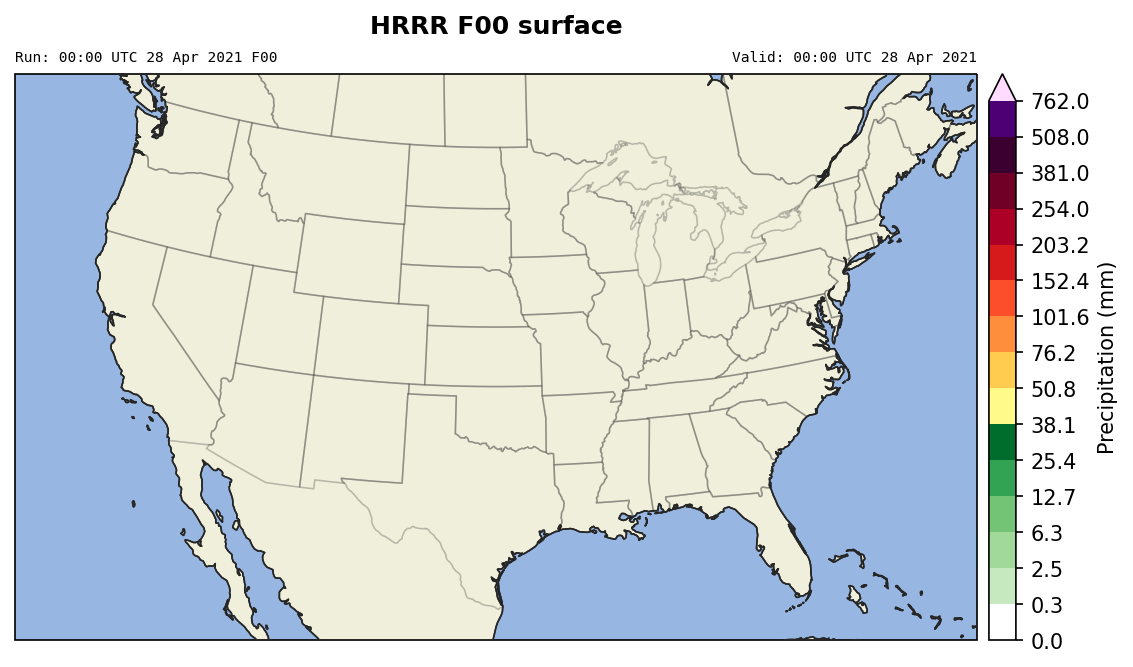

In [5]:
h00.herbie.plot(get_ax())

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


cfgrib variable: tp
GRIB_cfName unknown
GRIB_cfVarName unknown
GRIB_name Total Precipitation
GRIB_units kg m**-2
GRIB_typeOfLevel surface



/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "tp".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie

<GeoAxesSubplot:title={'left':'Run: 00:00 UTC 28 Apr 2021 F06','center':'HRRR F05-F06 surface\n','right':'Valid: 06:00 UTC 28 Apr 2021'}>

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


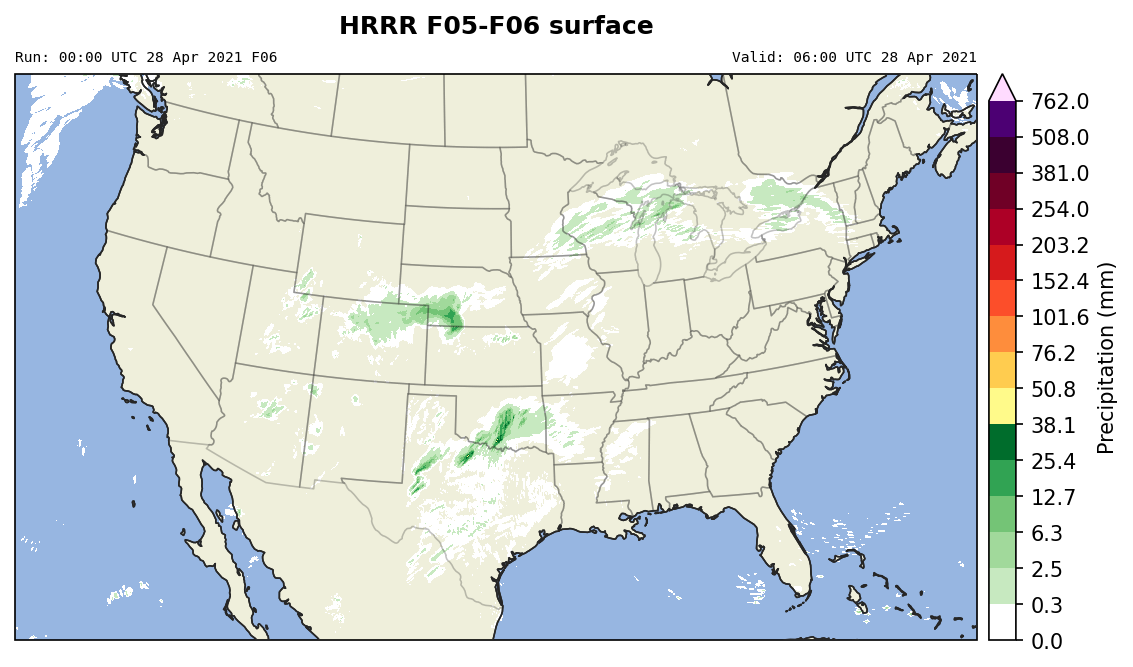

In [6]:
h06_1hr.herbie.plot(get_ax())

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


cfgrib variable: tp
GRIB_cfName unknown
GRIB_cfVarName unknown
GRIB_name Total Precipitation
GRIB_units kg m**-2
GRIB_typeOfLevel surface



/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "tp".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie

<GeoAxesSubplot:title={'left':'Run: 00:00 UTC 28 Apr 2021 F06','center':'HRRR F00-F06 surface\n','right':'Valid: 06:00 UTC 28 Apr 2021'}>

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


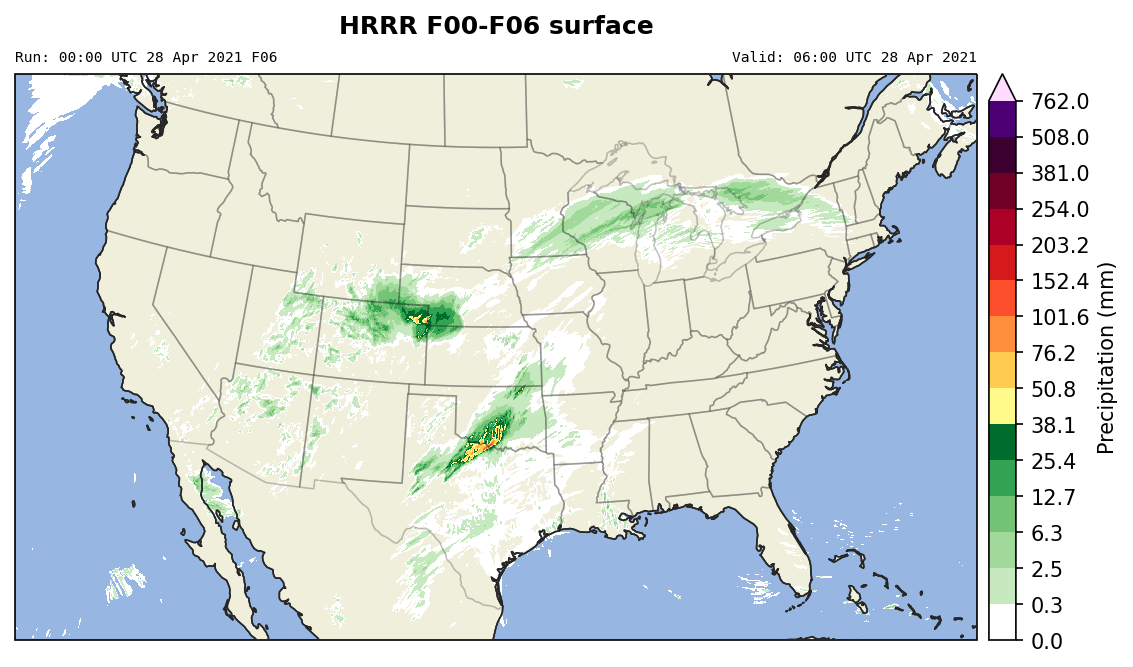

In [7]:
h06_6hr.herbie.plot(get_ax())

## Radar Reflectivity

In [8]:
href = Herbie('2021-04-28').xarray(':REFC:')

/p/home/blaylock/BB_python/Herbie/herbie/archive.py:286: UserWarning: `product` not specified. Will use ["sfc"].
  warnings.warn(f'`product` not specified. Will use ["{self.product}"].')


🏋🏻‍♂️ Found 2021-Apr-28 00:00 UTC F00 [HRRR] [product=sfc] GRIB2 file from aws and index file from aws.                                                                                                                                                       
📇 Download subset: [HRRR] model [sfc] product run at 2021-Apr-28 00:00 UTC F00                                                            
 cURL from https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20210428/conus/hrrr.t00z.wrfsfcf00.grib2
   1: GRIB_message=1   :REFC:entire atmosphere:anl


/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


cfgrib variable: refc
GRIB_cfName unknown
GRIB_cfVarName unknown
GRIB_name Maximum/Composite radar reflectivity
GRIB_units dB
GRIB_typeOfLevel atmosphere



/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anac

<GeoAxesSubplot:title={'left':'Run: 00:00 UTC 28 Apr 2021 F00','center':'HRRR  atmosphere\n','right':'Valid: 00:00 UTC 28 Apr 2021'}>

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


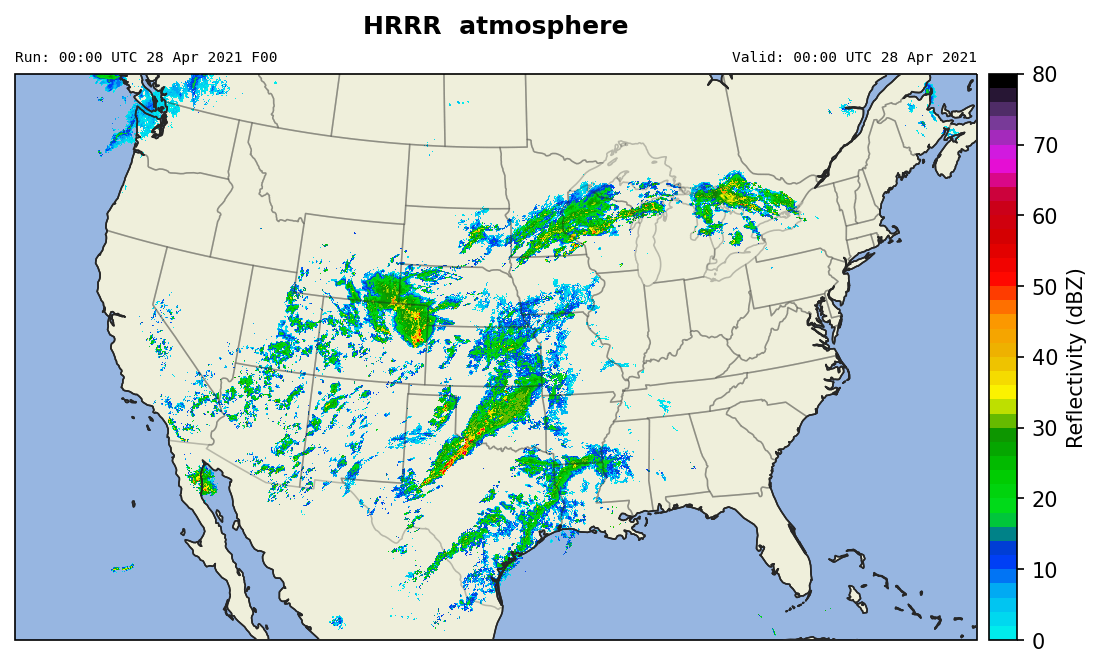

In [9]:
href.herbie.plot(get_ax())

## Precipitation Rate
It looks like the f00 precipitation rate is also an empty array.

In [10]:
hrate = Herbie('2019-04-28').xarray(':PRATE:')
hrate1 = Herbie('2019-04-28', fxx=1).xarray(':PRATE:')

/p/home/blaylock/BB_python/Herbie/herbie/archive.py:286: UserWarning: `product` not specified. Will use ["sfc"].
  warnings.warn(f'`product` not specified. Will use ["{self.product}"].')


🏋🏻‍♂️ Found 2019-Apr-28 00:00 UTC F00 [HRRR] [product=sfc] GRIB2 file from aws and index file from aws.                                                                                                                                                       
📇 Download subset: [HRRR] model [sfc] product run at 2019-Apr-28 00:00 UTC F00                                                            
 cURL from https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20190428/conus/hrrr.t00z.wrfsfcf00.grib2
   1: GRIB_message=77  :PRATE:surface:anl


/p/home/blaylock/BB_python/Herbie/herbie/archive.py:286: UserWarning: `product` not specified. Will use ["sfc"].
  warnings.warn(f'`product` not specified. Will use ["{self.product}"].')


🏋🏻‍♂️ Found 2019-Apr-28 00:00 UTC F01 [HRRR] [product=sfc] GRIB2 file from aws and index file from aws.                                                                                                                                                       
📇 Download subset: [HRRR] model [sfc] product run at 2019-Apr-28 00:00 UTC F01                                                            
 cURL from https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20190428/conus/hrrr.t00z.wrfsfcf01.grib2
   1: GRIB_message=77  :PRATE:surface:1 hour fcst


/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


cfgrib variable: prate
GRIB_cfName unknown
GRIB_cfVarName prate
GRIB_name Precipitation rate
GRIB_units kg m**-2 s**-1
GRIB_typeOfLevel surface



/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "prate".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<GeoAxesSubplot:title={'left':'Run: 00:00 UTC 28 Apr 2019 F00','center':'HRRR  surface\n','right':'Valid: 00:00 UTC 28 Apr 2019'}>

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


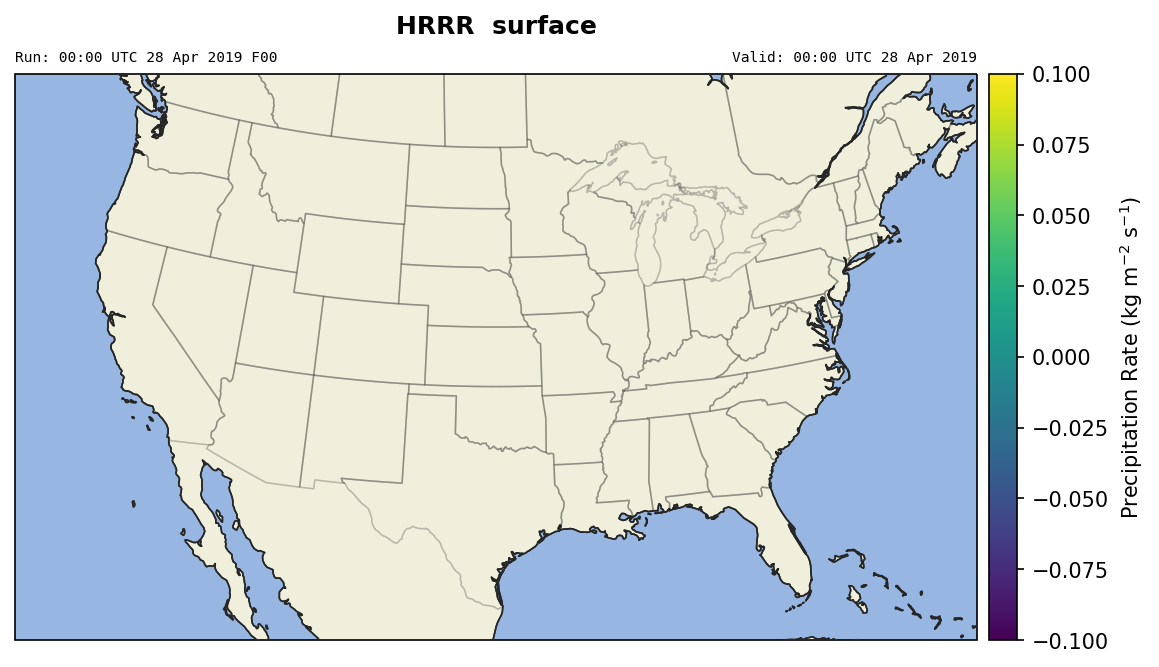

In [11]:
hrate['prate'] = hrate.prate.where(hrate.prate!=0)
hrate.herbie.plot(get_ax())

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


cfgrib variable: prate
GRIB_cfName unknown
GRIB_cfVarName prate
GRIB_name Precipitation rate
GRIB_units kg m**-2 s**-1
GRIB_typeOfLevel surface



/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "prate".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<GeoAxesSubplot:title={'left':'Run: 00:00 UTC 28 Apr 2019 F01','center':'HRRR  surface\n','right':'Valid: 01:00 UTC 28 Apr 2019'}>

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


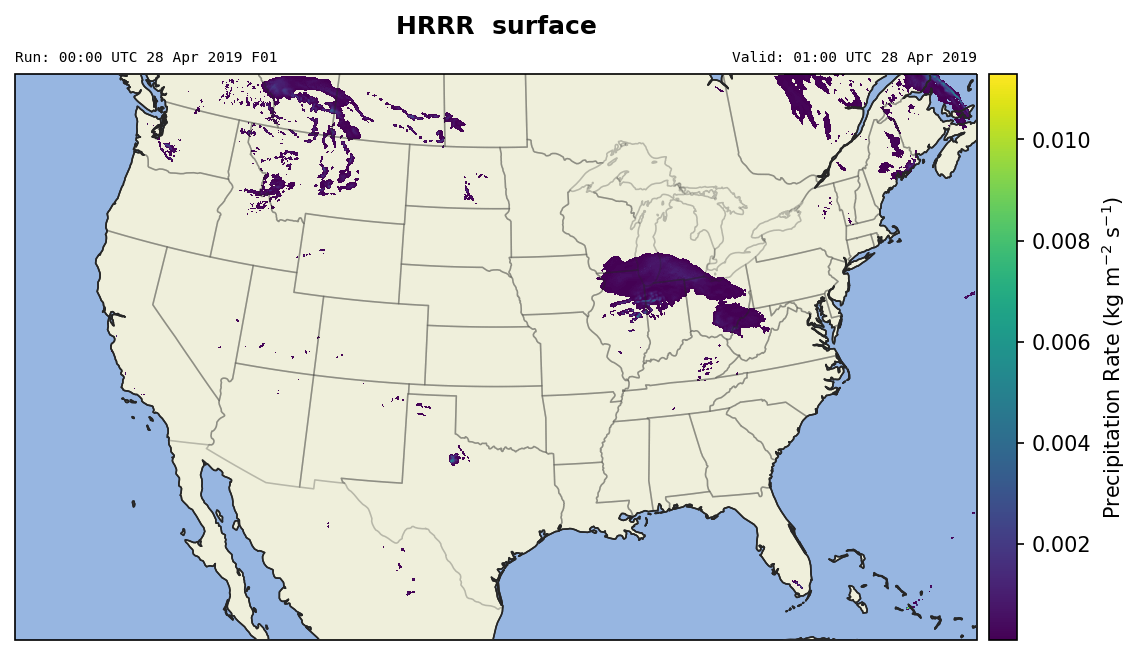

In [12]:
hrate1['prate'] = hrate1.prate.where(hrate1.prate!=0)
hrate1.herbie.plot(get_ax())